<a href="https://colab.research.google.com/github/JSA-V/freeCodeCamp-projects/blob/main/fcc_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Health insurance expenses prediction using regression on TensorFlow

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.9.2


In [ ]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
#dataset.head()
#dataset.tail()
dataset

--2022-11-08 15:54:47--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.2.33, 104.26.3.33, 172.67.70.149, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.2.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv’

insurance.csv       100%[===================>]  49.09K  --.-KB/s    in 0.001s  

2022-11-08 15:54:47 (36.6 MB/s) - ‘insurance.csv’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [ ]:
# convert sex and smoker labels to numeric and one-hot encode region label 

dataset['sex']=dataset['sex'].map({'male':1,'female':0})
dataset['smoker']=dataset['smoker'].map({'yes':1,'no':0})
dataset = pd.get_dummies(dataset, columns=['region'], prefix='', prefix_sep='')
dataset

,age,sex,bmi,children,smoker,expenses,northeast,northwest,southeast,southwest
0,19,0,27.9,0,1,16884.92,0,0,0,1
1,18,1,33.8,1,0,1725.55,0,0,1,0
2,28,1,33.0,3,0,4449.46,0,0,1,0
3,33,1,22.7,0,0,21984.47,0,1,0,0
4,32,1,28.9,0,0,3866.86,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,31.0,3,0,10600.55,0,1,0,0
1334,18,0,31.9,0,0,2205.98,1,0,0,0
1335,18,0,36.9,0,0,1629.83,0,0,1,0
1336,21,0,25.8,0,0,2007.95,0,0,0,1


In [ ]:
#dataset.describe() # basic statistics
dataset.corr() # correlation matrix

,age,sex,bmi,children,smoker,expenses,northeast,northwest,southeast,southwest
age,1.000000,-0.020856,0.109341,0.042469,-0.025019,0.299008,0.002475,-0.000407,-0.011642,0.010016
sex,-0.020856,1.000000,0.046380,0.017163,0.076185,0.057292,-0.002425,-0.011156,0.017117,-0.004184
bmi,0.109341,0.046380,1.000000,0.012645,0.003968,0.198576,-0.138091,-0.135992,0.270144,-0.006398
children,0.042469,0.017163,0.012645,1.000000,0.007673,0.067998,-0.022808,0.024806,-0.023066,0.021914
smoker,-0.025019,0.076185,0.003968,0.007673,1.000000,0.787251,0.002811,-0.036945,0.068498,-0.036945
expenses,0.299008,0.057292,0.198576,0.067998,0.787251,1.000000,0.006349,-0.039905,0.073982,-0.043210
northeast,0.002475,-0.002425,-0.138091,-0.022808,0.002811,0.006349,1.000000,-0.320177,-0.345561,-0.320177
northwest,-0.000407,-0.011156,-0.135992,0.024806,-0.036945,-0.039905,-0.320177,1.000000,-0.346265,-0.320829
southeast,-0.011642,0.017117,0.270144,-0.023066,0.068498,0.073982,-0.345561,-0.346265,1.000000,-0.346265
southwest,0.010016,-0.004184,-0.006398,0.021914,-0.036945,-0.043210,-0.320177,-0.320829,-0.346265,1.000000


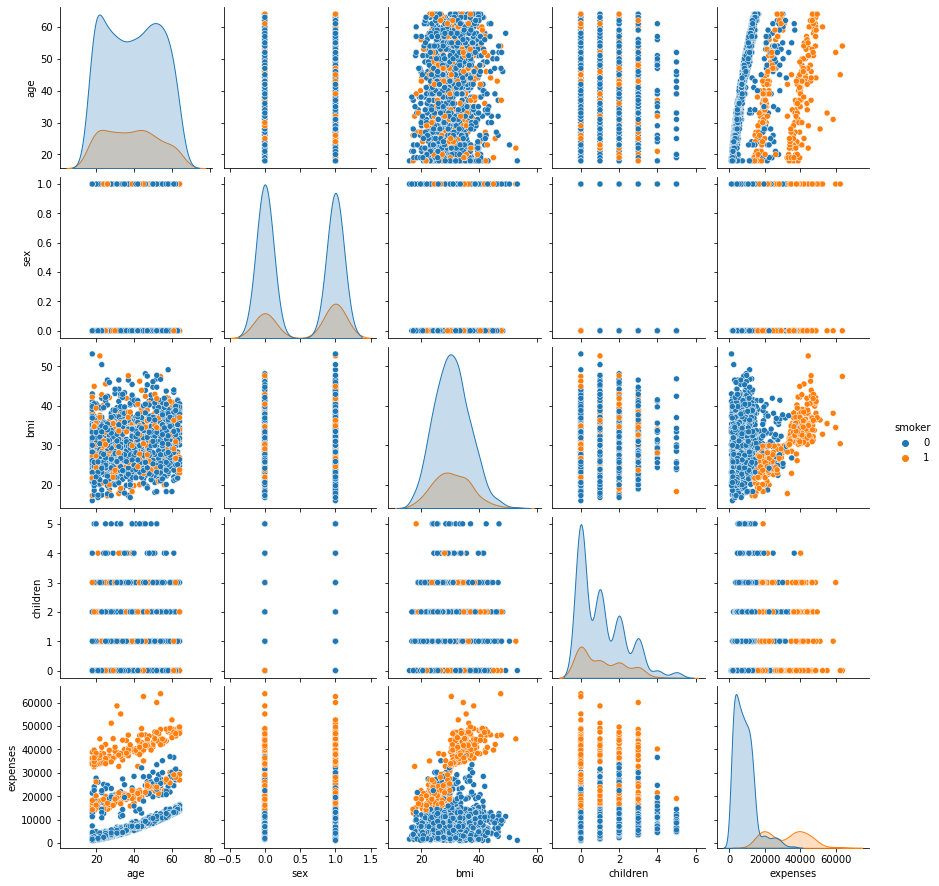

In [ ]:
sns.pairplot(dataset.iloc[:,:6], diag_kind='kde',hue='smoker')
#dataset.hist()
#dataset['sex'].value_counts().plot(kind='barh')
#dataset['smoker'].value_counts().plot(kind='barh')
#dataset['region'].value_counts().plot(kind='barh')

In [ ]:
# Training/evaluation splitting

n_items=dataset.index.stop
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)
n_train=train_dataset.shape[0]
n_test=test_dataset.shape[0]

print('  Number of samples for training:',n_train)
print('Number of samples for evaluation:',n_test )
print('                     Total items:',n_items)
print('Training data frame:\n',train_dataset)
print('Evaluation data frame:\n',test_dataset)

  Number of samples for training: 1070
Number of samples for evaluation: 268
                     Total items: 1338
Training data frame:
       age  sex   bmi  children  smoker  expenses  northeast  northwest  \
578    52    1  30.2         1       0   9724.53          0          0   
610    47    0  29.4         1       0   8547.69          0          0   
569    48    1  40.6         2       1  45702.02          0          1   
1034   61    1  38.4         0       0  12950.07          0          1   
198    51    0  18.1         0       0   9644.25          0          1   
...   ...  ...   ...       ...     ...       ...        ...        ...   
584    19    1  20.7         0       0   1242.82          0          0   
147    51    0  37.7         1       0   9877.61          0          0   
160    42    0  26.6         0       1  21348.71          0          1   
750    37    0  26.4         0       1  19539.24          0          0   
859    57    1  28.1         0       0  10965.45

In [ ]:
# features/labels splitting

train_labels = train_dataset.pop('expenses')
test_labels = test_dataset.pop('expenses')

print('Labels for test:\n',test_labels)

Labels for test:
 11      27808.73
23      37701.88
24       6203.90
25      14001.13
28       2775.19
          ...   
1305     2464.62
1315    11272.33
1318    19496.72
1326     7050.02
1333    10600.55
Name: expenses, Length: 268, dtype: float64


In [ ]:
# Normalization

normalizer = layers.Normalization()
normalizer.adapt(train_dataset)
print('Feature means:',normalizer.mean)

features = np.array(train_dataset)
with np.printoptions(precision=2, suppress=True):
  print('Normalized features:\n', normalizer(features))

Feature means: tf.Tensor(
[[39.036446    0.49813083 30.737288    1.093458    0.19906542  0.24859811
   0.23551399  0.28130844  0.23457943]], shape=(1, 9), dtype=float32)
Normalized features:
 tf.Tensor(
[[ 0.92  1.   -0.09 ... -0.56 -0.63  1.81]
 [ 0.56 -1.   -0.22 ... -0.56  1.6  -0.55]
 [ 0.63  1.    1.63 ...  1.8  -0.63 -0.55]
 ...
 [ 0.21 -1.   -0.68 ...  1.8  -0.63 -0.55]
 [-0.14 -1.   -0.72 ... -0.56  1.6  -0.55]
 [ 1.27  1.   -0.44 ... -0.56 -0.63  1.81]], shape=(1070, 9), dtype=float32)


In [ ]:
# define function that build and train model

def build_model(learning_rate):
  # topography of the model
  model = tf.keras.Sequential([
      normalizer,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      #layers.Dense(64, activation='relu'),
      #layers.Dense(64, activation='relu'), # between 3 and 4 layers needed to improve solution 
      layers.Dense(units=1)
      ])
  #model.summary()

  # configure
  model.compile(
      optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
      loss='mean_absolute_error',
      metrics=['mean_absolute_error','mean_squared_error'])
  return model

def train_model(train_dataset,train_labels,epochs): 
  history = model.fit(
      train_dataset,
      train_labels,
      epochs=epochs,
      # Suppress logging.
      verbose=0,
      # Calculate validation results on 20% of the training data.
      validation_split = 0.2)
  return history

In [ ]:
# visualize the model's training progress 

def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  #plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [expenses]')
  plt.legend()
  plt.grid(True)
#plot_loss(history)

CPU times: user 58.7 s, sys: 3.65 s, total: 1min 2s
Wall time: 1min 22s


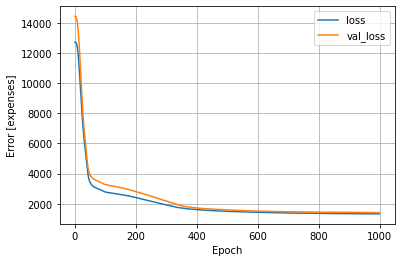

In [ ]:
# call functions

%%time
# hyperparameters
learning_rate=0.001
epochs=1000

# functions
model=build_model(learning_rate)
history=train_model(train_dataset,train_labels,epochs)
plot_loss(history)

9/9 - 0s - loss: 2055.1155 - mean_absolute_error: 2055.1155 - mean_squared_error: 33611280.0000 - 22ms/epoch - 2ms/step
Testing set Mean Abs Error: 2055.12 expenses
You passed the challenge. Great job!
9/9 [==============================] - 0s 1ms/step


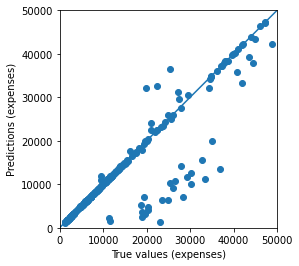

In [ ]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
